# Car Sales
## Objectives
### objective 1
To identify factors considered while re-selling the car
### objective 2


In [2]:
import pandas as pd
import numpy as np
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
import pandas as pd
new=pd.read_excel(r"C:\Users\Shrikant\Desktop\Python\Car_PricePrediction.xlsx")
new

,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale
0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,16.360
1,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,19.875
2,35.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,18.225
3,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,29.725
4,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,22.255
...,...,...,...,...,...,...,...,...,...,...
151,24.40,1.9,160,100.5,67.6,176.6,3.042,15.8,25,18.061
152,27.50,2.4,168,104.9,69.3,185.9,3.208,17.9,25,18.061
153,28.80,2.4,168,104.9,69.3,186.2,3.259,17.9,25,18.061
154,45.50,2.3,236,104.9,71.5,185.7,3.601,18.5,23,18.061


In [4]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price_in_thousands  156 non-null    float64
 1   Engine_size         156 non-null    float64
 2   Horsepower          156 non-null    int64  
 3   Wheelbase           156 non-null    float64
 4   Width               156 non-null    float64
 5   Length              156 non-null    float64
 6   Curb_weight         156 non-null    float64
 7   Fuel_capacity       156 non-null    float64
 8   Fuel_efficiency     156 non-null    int64  
 9   Resale              156 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 12.3 KB


In [5]:
new.describe()

,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Resale
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,27.439532,3.060897,185.948718,107.487179,71.150000,187.343590,3.381949,17.951923,23.878205,18.060808
std,14.318249,1.044653,56.700321,7.641303,3.451872,13.431754,0.630372,3.887921,4.296049,10.076940
min,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,5.160000
25%,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,12.527500
50%,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,17.617500
75%,32.253750,3.575000,215.000000,112.200000,73.425000,196.125000,3.821500,19.575000,26.000000,18.080750
max,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,67.550000


<AxesSubplot:>

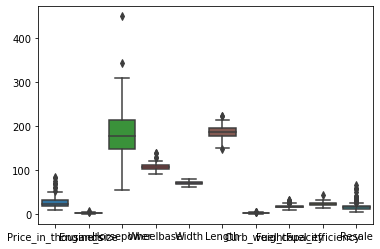

In [6]:
sns.boxplot(data=new)

In [7]:
q1= new['Price_in_thousands'].quantile(0.25)    
q3= new['Price_in_thousands'].quantile(0.75)
iqr=q3-q1
#lower_limit= q3-1.5*iqr
upper_limit= q3+1.5*iqr
upper_limit
new['Price_in_thousands']=np.where(new['Price_in_thousands']>upper_limit, upper_limit, new['Price_in_thousands'])

In [8]:
q1= new['Engine_size'].quantile(0.25)    
q3= new['Engine_size'].quantile(0.75)
iqr=q3-q1
#lower_limit= q3-1.5*iqr
upper_limit= q3+1.5*iqr
upper_limit
new['Engine_size']=np.where(new['Engine_size']>upper_limit, upper_limit, new['Engine_size'])

In [9]:
q1= new['Horsepower'].quantile(0.25)    
q3= new['Horsepower'].quantile(0.75)
iqr=q3-q1
#lower_limit= q3-1.5*iqr
upper_limit= q3+1.5*iqr
upper_limit
new['Horsepower']=np.where(new['Horsepower']>upper_limit, upper_limit, new['Horsepower'])

In [10]:
q1= new['Wheelbase'].quantile(0.25)    
q3= new['Wheelbase'].quantile(0.75)
iqr=q3-q1
#lower_limit= q3-1.5*iqr
upper_limit= q3+1.5*iqr
upper_limit
new['Wheelbase']=np.where(new['Wheelbase']>upper_limit, upper_limit, new['Wheelbase'])


In [11]:
q1= new['Length'].quantile(0.25)    
q3= new['Length'].quantile(0.75)
iqr=q3-q1
lower_limit= q3-1.5*iqr
lower_limit
new['Length']=np.where(new['Length']<lower_limit, lower_limit, new['Length'])

In [12]:
q1= new['Length'].quantile(0.25)    
q3= new['Length'].quantile(0.75)
iqr=q3-q1
upper_limit= q3+1.5*iqr
upper_limit
new['Length']=np.where(new['Length']>upper_limit, upper_limit, new['Length'])


In [13]:
q1= new['Curb_weight'].quantile(0.25)    
q3= new['Curb_weight'].quantile(0.75)
iqr=q3-q1
#lower_limit= q3-1.5*iqr
upper_limit= q3+1.5*iqr
upper_limit
new['Curb_weight']=np.where(new['Curb_weight']>upper_limit, upper_limit, new['Curb_weight'])

In [14]:
q1= new['Fuel_capacity'].quantile(0.25)    
q3= new['Fuel_capacity'].quantile(0.75)
iqr=q3-q1
#lower_limit= q3-1.5*iqr
upper_limit= q3+1.5*iqr
upper_limit
new['Fuel_capacity']=np.where(new['Fuel_capacity']>upper_limit, upper_limit, new['Fuel_capacity'])

In [15]:
q1= new['Fuel_efficiency'].quantile(0.25)    
q3= new['Fuel_efficiency'].quantile(0.75)
iqr=q3-q1
#lower_limit= q3-1.5*iqr
upper_limit= q3+1.5*iqr
upper_limit
new['Fuel_efficiency']=np.where(new['Fuel_efficiency']>upper_limit, upper_limit, new['Fuel_efficiency'])

In [16]:
q1= new['Resale'].quantile(0.25)    
q3= new['Resale'].quantile(0.75)
iqr=q3-q1
#lower_limit= q3-1.5*iqr
upper_limit= q3+1.5*iqr
upper_limit
new['Resale']=np.where(new['Resale']>upper_limit, upper_limit, new['Resale'])

<AxesSubplot:>

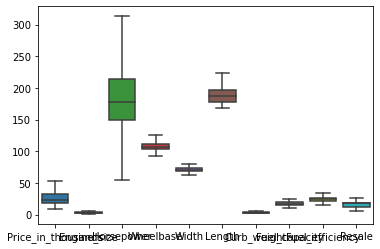

In [17]:
sns.boxplot(data=new)

In [18]:
new.isna().sum()

Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Resale                0
dtype: int64

In [19]:
X=new.drop('Resale',axis=1)
Y=new[['Resale']]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, train_size=0.7, random_state=6)

In [20]:
new1= pd.concat([Y_train, X_train], axis=1)
new1.head()

,Resale,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
51,16.640,31.930,4.0,210.0,111.6,70.2,190.7,3.876,21.0,19.0
49,18.061,12.315,2.0,107.0,103.0,66.9,174.8,2.564,13.2,30.0
46,12.760,21.560,3.8,190.0,101.3,73.1,183.2,3.203,15.7,24.0
12,20.190,31.965,3.8,205.0,113.8,74.7,206.8,3.778,18.5,24.0
59,17.525,26.600,3.2,205.0,106.4,70.4,178.2,3.857,21.1,19.0


In [21]:
new1.corr()

,Resale,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
Resale,1.000000,0.814873,0.504107,0.711022,0.151976,0.284987,0.138547,0.502384,0.452863,-0.461798
Price_in_thousands,0.814873,1.000000,0.673486,0.882607,0.213743,0.460694,0.221128,0.629306,0.535228,-0.586009
Engine_size,0.504107,0.673486,1.000000,0.821734,0.488525,0.745195,0.553247,0.805212,0.710800,-0.759366
Horsepower,0.711022,0.882607,0.821734,1.000000,0.312377,0.583453,0.377851,0.654297,0.565634,-0.631204
Wheelbase,0.151976,0.213743,0.488525,0.312377,1.000000,0.658558,0.824579,0.674898,0.608608,-0.442052
Width,0.284987,0.460694,0.745195,0.583453,0.658558,1.000000,0.670482,0.760926,0.641519,-0.640643
Length,0.138547,0.221128,0.553247,0.377851,0.824579,0.670482,1.000000,0.653575,0.548402,-0.405053
Curb_weight,0.502384,0.629306,0.805212,0.654297,0.674898,0.760926,0.653575,1.000000,0.890744,-0.822694
Fuel_capacity,0.452863,0.535228,0.710800,0.565634,0.608608,0.641519,0.548402,0.890744,1.000000,-0.830983
Fuel_efficiency,-0.461798,-0.586009,-0.759366,-0.631204,-0.442052,-0.640643,-0.405053,-0.822694,-0.830983,1.000000


<AxesSubplot:>

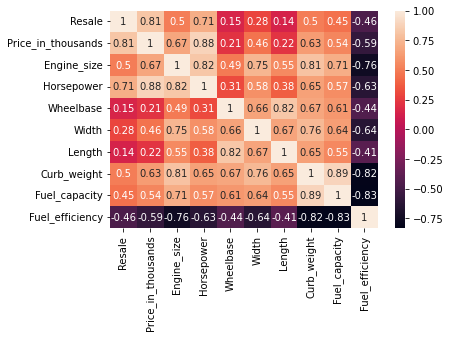

In [22]:
sns.heatmap(new1.corr(), annot=True)

(0.0, 55.72637499999999)

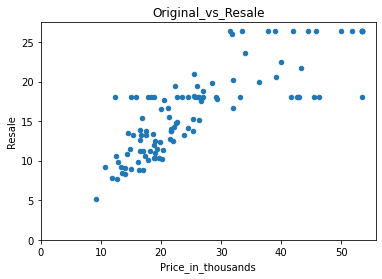

In [36]:
new1.plot.scatter(x='Price_in_thousands', y='Resale', title='Original_vs_Resale')
plt.ylim(0,)
plt.xlim(0,)

(0.0, 55.72637499999999)

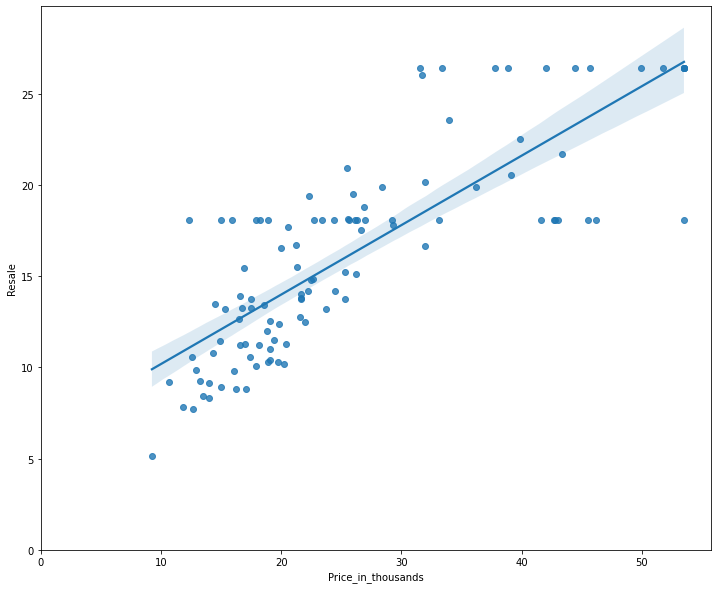

In [38]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x="Price_in_thousands", y="Resale", data= new1)
plt.ylim(0,)
plt.xlim(0,)

In [24]:
new1.head()

,Resale,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
51,16.640,31.930,4.0,210.0,111.6,70.2,190.7,3.876,21.0,19.0
49,18.061,12.315,2.0,107.0,103.0,66.9,174.8,2.564,13.2,30.0
46,12.760,21.560,3.8,190.0,101.3,73.1,183.2,3.203,15.7,24.0
12,20.190,31.965,3.8,205.0,113.8,74.7,206.8,3.778,18.5,24.0
59,17.525,26.600,3.2,205.0,106.4,70.4,178.2,3.857,21.1,19.0


In [25]:
X1=new1.drop(['Resale'], axis= 1)
series_before= pd.Series([variance_inflation_factor(X1.values, i)
                         for i in range(X1.shape[1])],
                         index=X1.columns)
series_before


Price_in_thousands      37.519631
Engine_size             64.056456
Horsepower             113.075598
Wheelbase             1063.277818
Width                  717.353508
Length                1062.820185
Curb_weight            320.653456
Fuel_capacity          154.689367
Fuel_efficiency        125.580953
dtype: float64

# Model Building
H0 :- There is no Linear relationship between Resale and all other factors

Vs 

H1 :- There is Linear relationship between Resale and all other factors

Alpha = 0.05 (5%)

In [26]:
new1.head()

,Resale,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
51,16.640,31.930,4.0,210.0,111.6,70.2,190.7,3.876,21.0,19.0
49,18.061,12.315,2.0,107.0,103.0,66.9,174.8,2.564,13.2,30.0
46,12.760,21.560,3.8,190.0,101.3,73.1,183.2,3.203,15.7,24.0
12,20.190,31.965,3.8,205.0,113.8,74.7,206.8,3.778,18.5,24.0
59,17.525,26.600,3.2,205.0,106.4,70.4,178.2,3.857,21.1,19.0


In [27]:
import statsmodels.formula.api as smf
model = smf.ols('Resale ~ Price_in_thousands + Engine_size + Horsepower + Wheelbase + Width + Length+ Curb_weight+ Fuel_capacity+ Fuel_efficiency',data=new1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Resale   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     24.09
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           2.73e-21
Time:                        15:05:54   Log-Likelihood:                -276.94
No. Observations:                 109   AIC:                             573.9
Df Residuals:                      99   BIC:                             600.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             19.7736     11.196      1.766      0.080      -2.442      41.990
Price_in_thousands     0.3398      0.067      5.064      0.000       0.207       0.473
Engine_size           -0.6071      0.787     -0.771      0.443      -2.170       0.955
Horsepower             0.0172      0.017      0.990      0.324      -0.017       0.052
Wheelbase              0.0286      0.094      0.304      0.762      -0.158       0.215
Width                 -0.2948      0.165     -1.782      0.078      -0.623       0.033
Length                -0.0202      0.054     -0.376      0.708      -0.127       0.086
Curb_weight            0.9917      1.668      0.595      0.553      -2.318       4.301
Fuel_capacity          0.1788      0.228      0.785      0.435      -0.273       0.631
Fuel_efficiency        0.0669      0.164      0.409      0.684      -0.258       0.392
==============================================================================
Omnibus:                        1.367   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.505   Jarque-Bera (JB):                1.195
Skew:                           0.256   Prob(JB):                        0.550
Kurtosis:                       2.974   Cond. No.                     1.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The P value should be less than Alpha

In [28]:
import statsmodels.formula.api as smf
model = smf.ols('Resale ~ Price_in_thousands + Engine_size + Horsepower +Width + Length+ Curb_weight+ Fuel_capacity+ Fuel_efficiency',data=new1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Resale   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     27.34
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           5.25e-22
Time:                        15:05:54   Log-Likelihood:                -276.99
No. Observations:                 109   AIC:                             572.0
Df Residuals:                     100   BIC:                             596.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             19.9099     11.137      1.788      0.077      -2.185      42.004
Price_in_thousands     0.3388      0.067      5.078      0.000       0.206       0.471
Engine_size           -0.6404      0.776     -0.825      0.411      -2.180       0.900
Horsepower             0.0170      0.017      0.987      0.326      -0.017       0.051
Width                 -0.2846      0.161     -1.765      0.081      -0.605       0.035
Length                -0.0107      0.043     -0.246      0.806      -0.097       0.076
Curb_weight            1.0730      1.639      0.655      0.514      -2.179       4.324
Fuel_capacity          0.1897      0.224      0.847      0.399      -0.255       0.634
Fuel_efficiency        0.0715      0.162      0.441      0.660      -0.250       0.394
==============================================================================
Omnibus:                        1.470   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.480   Jarque-Bera (JB):                1.266
Skew:                           0.264   Prob(JB):                        0.531
Kurtosis:                       2.994   Cond. No.                     1.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
import statsmodels.formula.api as smf
model = smf.ols('Resale ~ Price_in_thousands + Engine_size + Horsepower +Width + Curb_weight+ Fuel_capacity+ Fuel_efficiency',data=new1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Resale   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     31.53
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           9.22e-23
Time:                        15:05:54   Log-Likelihood:                -277.03
No. Observations:                 109   AIC:                             570.1
Df Residuals:                     101   BIC:                             591.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             19.6699     11.042      1.781      0.078      -2.234      41.574
Price_in_thousands     0.3448      0.062      5.574      0.000       0.222       0.468
Engine_size           -0.6421      0.773     -0.831      0.408      -2.175       0.890
Horsepower             0.0161      0.017      0.961      0.339      -0.017       0.049
Width                 -0.2964      0.153     -1.934      0.056      -0.600       0.008
Curb_weight            0.9109      1.493      0.610      0.543      -2.052       3.873
Fuel_capacity          0.1872      0.223      0.840      0.403      -0.255       0.629
Fuel_efficiency        0.0580      0.152      0.382      0.704      -0.243       0.359
==============================================================================
Omnibus:                        1.478   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.478   Jarque-Bera (JB):                1.300
Skew:                           0.267   Prob(JB):                        0.522
Kurtosis:                       2.974   Cond. No.                     7.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
import statsmodels.formula.api as smf
model = smf.ols('Resale ~ Price_in_thousands + Engine_size + Horsepower +Width + Curb_weight+ Fuel_capacity',data=new1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Resale   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     37.07
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           1.55e-23
Time:                        15:05:54   Log-Likelihood:                -277.11
No. Observations:                 109   AIC:                             568.2
Df Residuals:                     102   BIC:                             587.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             22.0556      9.063      2.434      0.017       4.080      40.031
Price_in_thousands     0.3431      0.061      5.584      0.000       0.221       0.465
Engine_size           -0.7057      0.751     -0.939      0.350      -2.196       0.784
Horsepower             0.0163      0.017      0.974      0.332      -0.017       0.049
Width                 -0.2965      0.153     -1.943      0.055      -0.599       0.006
Curb_weight            0.8594      1.481      0.580      0.563      -2.078       3.797
Fuel_capacity          0.1526      0.203      0.753      0.453      -0.249       0.555
==============================================================================
Omnibus:                        1.464   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.481   Jarque-Bera (JB):                1.281
Skew:                           0.265   Prob(JB):                        0.527
Kurtosis:                       2.979   Cond. No.                     6.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
import statsmodels.formula.api as smf
model = smf.ols('Resale ~ Price_in_thousands + Engine_size + Horsepower +Width + Fuel_capacity',data=new1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Resale   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     44.71
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           2.58e-24
Time:                        15:05:54   Log-Likelihood:                -277.28
No. Observations:                 109   AIC:                             566.6
Df Residuals:                     103   BIC:                             582.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             20.5682      8.664      2.374      0.019       3.384      37.752
Price_in_thousands     0.3548      0.058      6.130      0.000       0.240       0.470
Engine_size           -0.5711      0.712     -0.802      0.424      -1.984       0.841
Horsepower             0.0140      0.016      0.864      0.390      -0.018       0.046
Width                 -0.2608      0.139     -1.874      0.064      -0.537       0.015
Fuel_capacity          0.2390      0.137      1.744      0.084      -0.033       0.511
==============================================================================
Omnibus:                        1.798   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.687
Skew:                           0.301   Prob(JB):                        0.430
Kurtosis:                       2.911   Cond. No.                     5.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
import statsmodels.formula.api as smf
model = smf.ols('Resale ~ Price_in_thousands + Horsepower +Width + Fuel_capacity',data=new1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Resale   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     55.92
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           4.42e-25
Time:                        15:05:54   Log-Likelihood:                -277.62
No. Observations:                 109   AIC:                             565.2
Df Residuals:                     104   BIC:                             578.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             23.8966      7.592      3.147      0.002       8.840      38.953
Price_in_thousands     0.3650      0.056      6.475      0.000       0.253       0.477
Horsepower             0.0065      0.013      0.491      0.624      -0.020       0.033
Width                 -0.3059      0.127     -2.407      0.018      -0.558      -0.054
Fuel_capacity          0.1963      0.126      1.557      0.123      -0.054       0.446
==============================================================================
Omnibus:                        1.882   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.390   Jarque-Bera (JB):                1.696
Skew:                           0.305   Prob(JB):                        0.428
Kurtosis:                       2.965   Cond. No.                     5.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
import statsmodels.formula.api as smf
model = smf.ols('Resale ~ Price_in_thousands + Width + Fuel_capacity',data=new1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Resale   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     75.02
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           5.27e-26
Time:                        15:05:54   Log-Likelihood:                -277.75
No. Observations:                 109   AIC:                             563.5
Df Residuals:                     105   BIC:                             574.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             22.8442      7.258      3.148      0.002       8.453      37.235
Price_in_thousands     0.3881      0.031     12.544      0.000       0.327       0.449
Width                 -0.2832      0.118     -2.400      0.018      -0.517      -0.049
Fuel_capacity          0.1972      0.126      1.570      0.119      -0.052       0.446
==============================================================================
Omnibus:                        1.489   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.475   Jarque-Bera (JB):                1.196
Skew:                           0.255   Prob(JB):                        0.550
Kurtosis:                       3.061   Cond. No.                     1.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
import statsmodels.formula.api as smf
model = smf.ols('Resale ~ Price_in_thousands + Width',data=new1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Resale   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     109.8
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           1.49e-26
Time:                        15:05:54   Log-Likelihood:                -279.02
No. Observations:                 109   AIC:                             564.0
Df Residuals:                     106   BIC:                             572.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             18.9289      6.863      2.758      0.007       5.323      32.535
Price_in_thousands     0.4052      0.029     13.896      0.000       0.347       0.463
Width                 -0.1856      0.101     -1.838      0.069      -0.386       0.015
==============================================================================
Omnibus:                        1.037   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                1.089
Skew:                           0.224   Prob(JB):                        0.580
Kurtosis:                       2.802   Cond. No.                     1.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The data accuracy is less than 75%, hence the data is not a good fit
### There is a relationship between resale and price in thousands and width